# SIR Model

This notebook is based on Module 4.3 of [Introduction to Computational Science](https://ics.wofford-ecs.org/)  by Angela Shiflet and George Shiflet. They reference [this presentation](http://shodor.org/ncslp/talks/basicstella/sld009.htm) by The Shodor Education Foundation. The SIR model was published by [Kermack and McKendrick, 1927](https://royalsocietypublishing.org/doi/abs/10.1098/rspa.1927.0118).

# Introduction

SIR is a simplistic model for the spread of infectious disease in which there are no births nor deaths nor immigration nor emmigration. There are three populations in ths model, for whom the model is named:

- Susceptibles (S): have no immunity from the disease and *can* become infected.
- Infecteds (I): have the disease and can spread it to susceptibles through interactions.
- Recovereds (R): have recovered from the disease and now have immunity and thus can not be infected again.

The total population is $N=S+I+R$ where $S$, $I$, and $R$ are the number of susceptibles, infecteds, and recovereds, respectively. In other words, all people (or other organism) in the system are in one of the three populations.

# Rate of Change

To model the time-evolution of the spread of disease, we have to write an equation for the rate of change for *each population*, by examining the processes through which a susceptible becomes infected and an infected becomes recovered. For each population, we have to figure out what causes an *increase* in the rate of change and a *decrease* in the rate of change. We will assume each process (or cause) is proportional in some way to a population or product of populations, and we will assume a unique proportionality constant $r_p$ for each process, $p$.

This is similar to what we did for the predator-prey model. We had to consider the processes (interactions in some cases) by which the predator and prey populations would increase or decrease, we defined proportionality constants for each process, and we wrote an equation for the rate of change of each population.

In this case, we have three populations, S, I, and R, and we will write three equations for the rate of change of each population.

Let's make a table to list all of the kinds of processes and interactions that will go into our model for each population.

Population | Process or Interaction | Associated Rate of Change | Proportionality Constant
--- | --- | --- | ---
Susceptibles (S) | becomes infected; depends on number of S and I interactions | $-(r_{S,I})SI$ | $r_{S,I}$
Recovereds (R) | recovers from infection; depends on number infected | $+(r_{R,I})I$ | $r_{R,I}$
Infecteds (I) | a susceptible becomes infected; the opposite of $\Delta S/\Delta t$ | $-\frac{\Delta S}{\Delta t}=(r_{S,I})SI$ | 
Infecteds (I) | an infected recovers; the opposite of $\Delta R/\Delta t$ | $-\frac{\Delta R}{\Delta t}=-(r_{R,I})I$ | 

The rate of change of each population is

$$\dot{S} = \frac{\Delta S}{\Delta t} = -(r_{S,I})SI$$

$$\dot{R} = \frac{\Delta R}{\Delta t} = +(r_{R,I})I$$

When a susceptible becomes infected, S decreases and I increases by the same amount. When an infected recovers, R increases and I decreases by the same amount. Thus,

$$\dot{I} = \frac{\Delta I}{\Delta t} = -\left(\frac{\Delta S}{\Delta t}\right) +  -\left(\frac{\Delta R}{\Delta t}\right) = (r_{S,I})SI - (r_{R,I})I$$

## Recovery Rate

The constant, $r_{R,I}$, is called the *recovery rate*. It is one divided by the number of days a person remains infected. Thus, if for a particular flu virus, one recovers in two days, then the recovery rate is $1/2=0.5$, meaning half the population of infecteds will recover in one day.

## Transmission Constant

The constant, $r_{S,I}$, is the transmission constant of the disease. It depends on the number of unique interactions between the S and I populations, $SI$. It also depends on the probability of an interaction resulting in a transmission of the disease. We'll discuss the details of the transmission constant in more detail after exploring our model.

# Example - Spread of Flu in a Boarding School

[Source: NCSLP](http://shodor.org/ncslp/talks/basicstella/sld009.htm)

In 1978, a study was conducted and reported in the British Medical Journal of an outbreak of the influenza virus in a boys boarding school. The school had a population of 763 boys. Of these, 512 were confined to bed at some point during the epidemic, which lasted Jan. 22 - Feb. 4, 1978. The epidemic started with one infected boy. At the outbreak of the epidemic, none of the boys had previously had influenza, so none had immunity.

Therefore, this situation fits the simplistic assumptions of the SIR model.

Let's use the following values for initial conditions, recovery rate, and transmission constant. The unit of time is one day. The total population $N$ is 763 boys.

Variable or Constant | Value (in appropriate units)
--- | ---
S | 762
I | 1
R | 0
recovery rate, $r_{R,I}$ | 0.5; this is $\dfrac{1}{2\ days}$ where 2 days is the recovery time
transmission constant, $r_{S,I}$ | 0.00218

We'll discuss details of the transmission constant later. 

Let's write our program to compute the time-evolution of the SIR populations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

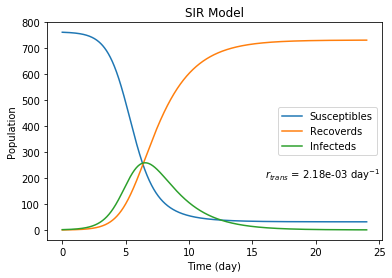

In [2]:
t = 0
dt = 0.01 #unit is day

N = 763
S = 762
I = 1
R = 0

r_SI = 0.00218
r_RI = 0.5

tdata = []
Sdata = []
Idata = []
Rdata = []

while t < 24:
    
    Sdot = -r_SI*S*I
    Rdot = r_RI*I
    Idot = -Sdot + -Rdot
    
    S = S + Sdot*dt
    R = R + Rdot*dt
    I = I + Idot*dt
    
    t = t + dt
    
    tdata.append(t)
    Sdata.append(S)
    Rdata.append(R)
    Idata.append(I)
    
fig = plt.figure()
plt.title("SIR Model")
plt.xlabel("Time (day)")
plt.ylabel("Population")
plt.plot(tdata, Sdata, label='Susceptibles')
plt.plot(tdata, Rdata, label='Recoverds')
plt.plot(tdata, Idata, label='Infecteds')
plt.text(16,200,'$r_{trans}$ = ' + '{:.2e}'.format(r_SI) + ' day$^{-1}$')
plt.legend()
plt.show()
#plt.savefig('SIR-low-trans.png')

## Exercise 1

Use the SIR model of the spread of influenza in the boarding school to answer the following questions.

1. On what day was the number of infecteds the largest?
2. On what day was more than 50% of all the boys either infected or recovered?
3. On what day was more than 50% of all the boys recovered?
4. How many susceptibles never became infected? What percentage of the initial susceptibles is this?
5. After 21 days, nearly all of the infecteds are recovered. The average daily transmission rate is the percentage of the total population that gets sick divided by the total time of the epidemic. What was the average daily transmission rate? This is the percentage of the population that gets sick each day. 
6. On average, how many boys per day got sick?

In [3]:
### BEGIN SOLUTION

percent_not_infected = S/(N-1)*100
print("Percent of the population never infected = ", percent_not_infected)
daily_trans = (100-percent_not_infected)/21
print("Percentage of the population infected per day = ", daily_trans)
daily_sick = R/21
print("Number of boys who became infected per day = ", daily_sick)

print()
print("Note: the model should use r_SI = 0.00218 for these questions.")
print("")
print("1. This is the day of the peak infecteds, Day 6.5, so let's call it Day 6.")
print("2. This is the day that 50% (of 762 boys) are susceptible, which is Day 5.6. Let's call it Day 5.")
print("3. This is the day that 50% (of 763 boys) are recovered, which is Day 7.4. Let's call it Day 7.")
print("4. 31 susceptibles were not infected. This is 4.1%.")
print("5. Daily transmission rate is 4.6%.")
print("6. On average, 35 boys per day became infected.")
### END SOLUTION

Percent of the population never infected =  4.095391884044429
Percentage of the population infected per day =  4.566886100759789
Number of boys who became infected per day =  34.83433063738398

Note: the model should use r_SI = 0.00218 for these questions.

1. This is the day of the peak infecteds, Day 6.5, so let's call it Day 6.
2. This is the day that 50% (of 762 boys) are susceptible, which is Day 5.6. Let's call it Day 5.
3. This is the day that 50% (of 763 boys) are recovered, which is Day 7.4. Let's call it Day 7.
4. 31 susceptibles were not infected. This is 4.1%.
5. Daily transmission rate is 4.6%.
6. On average, 35 boys per day became infected.


## Exercise 2: Investigating the Transmission Constant

Change the transmission constant to `r_SI = 0.005` and view the result. 

- What do you notice about the peak number of infecteds?
- What do you notice about the number of susceptibles who, after 24 days, were never infected?

Now, change it to `r_SI = 0.0015` and view the result.

- What do you notice about the peak number of infecteds?
- What do you notice about the number of susceptibles who, after 24 days, were never infected?

What is preferable for the total population, a high transmission constant or a low transmission constant? Justify your answer using the results of your model.

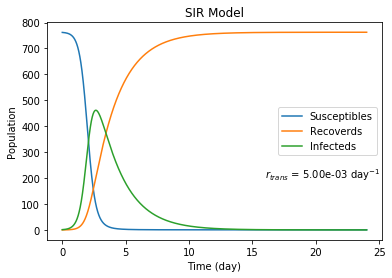

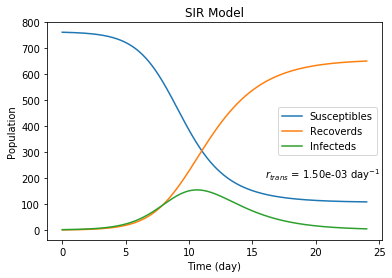

In [3]:
### BEGIN SOLUTION

def runModel(r_SI):
    t = 0
    dt = 0.01 #unit is day

    N = 763
    S = 762
    I = 1
    R = 0

#    r_SI = 0.00218
    r_RI = 0.5

    tdata = []
    Sdata = []
    Idata = []
    Rdata = []

    while t < 24:

        Sdot = -r_SI*S*I
        Rdot = r_RI*I
        Idot = -Sdot + -Rdot

        S = S + Sdot*dt
        R = R + Rdot*dt
        I = I + Idot*dt

        t = t + dt

        tdata.append(t)
        Sdata.append(S)
        Rdata.append(R)
        Idata.append(I)

    fig = plt.figure()
    plt.title("SIR Model")
    plt.xlabel("Time (day)")
    plt.ylabel("Population")
    plt.plot(tdata, Sdata, label='Susceptibles')
    plt.plot(tdata, Rdata, label='Recoverds')
    plt.plot(tdata, Idata, label='Infecteds')
    plt.text(16,200,'$r_{trans}$ = ' + '{:.2e}'.format(r_SI) + ' day$^{-1}$')
    plt.legend()
    plt.show()
    #plt.savefig('SIR-low-trans.png')

    
runModel(0.005)
runModel(0.0015)
### END SOLUTION

# What the Transmission Constant Depends On

The transmission constant depends on the following factors:

1. How many susceptibles does an infected person interact with in a day? An infected can't possibly interact with all the susceptibles. The more susceptibles an infected person contacts, the more who become infected. The fewer they interact with, the fewer who become infected. This is the idea behind *social distancing* -- reduce the number of daily interactions.
2. When an infected person interacts with a susceptible, what is the probability of the disease being transmitted? If the infected person coughs constantly on all the susceptibles, the probability is high. If the infected person and susceptibles are wearing gloves and masks, and the infected person is cautious to only cough into their elbow, etc., the probability is low. This is the idea behind practicing good hygiene -- reduce the probability of a single interaction resulting in transmission of the disease.

Each of these factors can be expressed as a probability. A probability of zero means that it does NOT occur. A probability of 1 means it ALWAYS occurs. A probability between 0 and 1 means it occurs some fraction of the time (or trials).

The rate of change of susceptibles becoming infected is

$$\begin{eqnarray}\frac{\Delta S}{\Delta t} & = & \left(\frac{\mathrm{Total\ Number\ of\ Daily\ Interactions\ of\ an\ Infected\ Person}}{\mbox{1 day}}\right) \times \\ \\ & & \left(\mbox{Probability that an interaction is with a susceptible} \right) \times \\ \\ & &\left(\mbox{Probability of transmission during an interaction} \right) \times \left( \mbox{Number of Infecteds} \right)\end{eqnarray}$$

Note that the units work out because the unit of the product is a population of susceptibles that become infected *per day*.

Let's examine each term.

**Daily interactions**

In this simple model, an infected person interacts with all of the population, both susceptibles and recoverds, with no care about transmission. Let's use the variable $f$ for the number of interactions per day with the entire population. Suppose an infected has:

$$f = 33.3 \ \mbox{interactions per day}$$

with the the entire population. But not all of these interactions are with susceptibles; some are with recovereds. 

**Probability of interacting with a susceptible**

The probability an interaction is with a susceptible is the fraction of the total population that is susceptible. So

$$\left(\mbox{Probability that an interaction is with a susceptible} \right) = \frac{S}{N}$$

where $N$ is the total population, 763 boys in the case of the boarding school.

**Probability of transmission during an interaction**

The quantity $f\dfrac{S}{N}$ gives us the number of interactions per day an infected person has with susceptibles. However, not all interactions result in transmission of the disease. The infected person might not cough on the susceptible, shake hands with the susceptible, etc. If good hygiene is practiced, the number of interactions that result in transmission is much lower. The probability of transmission during an interaction is the fraction of interactions with a susceptible that results in transmission. Suppose that only 1/20 interactions result in transmission, then

$$p_{trans} = \frac{1}{20} = 0.05$$

**Rate of change of susceptibles**

Multiply these factors to get the rate of change of susceptibles.

$$\begin{eqnarray}\frac{\Delta S}{\Delta t} & = & \left(\frac{\mathrm{Total\ Number\ of\ Daily\ Interactions\ of\ an\ Infected\ Person}}{\mbox{1 day}}\right) \times \\ \\ & & \left(\mbox{Probability that an interaction is with a susceptible} \right) \times \\ \\ & &\left(\mbox{Probability of transmission during an interaction} \right) \times \left( \mbox{Number of Infecteds} \right) \\ \\  & = & f \left(\frac{S}{N} \right)p_{trans} I  \\ \\ & = & \left(\frac{fp_{trans}}{N} \right) SI \end{eqnarray}$$

Notice that the rate of change of susceptibles is proportional to the product of the population of susceptibles and population of infecteds, $SI$, as expected. And, therefore, the transmission coefficient $r_{S,I}$ is

$$r_{S,I} = \frac{f p_{trans}}{N}$$

Using data for the boarding school,

$$r_{S,I} =  \frac{f p_{trans}}{N} = \frac{(33.3\ \mbox{interactions per day})(0.05)}{763} = 0.00218 $$

This is the number we used in our original model for the transmission coefficient. But, now we can see that it depends on the variables:

variable | description
--- | ---
$f$ | Number of interactions of an infected person with the entire population
$p_{trans}$ | The fraction of interactions with a susceptible that results in a transmission
$N$ | The total population

Let's rewrite our computer model in terms of these variables. This will allow us to change each variable to see how it affects the spread of disease.

# Computer Model with Variables that Affect Transmission

Here is our computer model. In this case, variables have been added for $N$, $f$, and $p_{trans}$, and the transmission coefficient is compute using these variables. In addition, the variable `t_total` is used to determine how long to run the model. For low transmission rate, you have to run the model for a longer time.

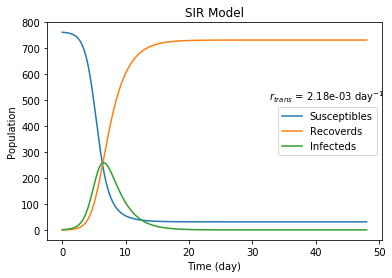

In [5]:
t = 0
dt = 0.01 #unit is day
t_total = 48 #number of days to run the model

N = 763 #total population
S = N - 1
I = 1
R = 0

f = 33.3 #interactions of an infected person per day with the total population
p_trans = 0.05 #fraction of interactions with a susceptible that result in transmission

r_SI = f*p_trans/N #transmission coefficient
r_RI = 0.5

tdata = []
Sdata = []
Idata = []
Rdata = []

while t < t_total:
    
    Sdot = -r_SI*S*I
    Rdot = r_RI*I
    Idot = -Sdot + -Rdot
    
    S = S + Sdot*dt
    R = R + Rdot*dt
    I = I + Idot*dt
    
    t = t + dt
    
    tdata.append(t)
    Sdata.append(S)
    Rdata.append(R)
    Idata.append(I)
    
fig = plt.figure()
plt.title("SIR Model")
plt.xlabel("Time (day)")
plt.ylabel("Population")
plt.plot(tdata, Sdata, label='Susceptibles')
plt.plot(tdata, Rdata, label='Recoverds')
plt.plot(tdata, Idata, label='Infecteds')
plt.text(0.68*t_total,500,'$r_{trans}$ = ' + '{:.2e}'.format(r_SI) + ' day$^{-1}$')
plt.legend()
plt.show()
#plt.savefig('SIR-high-trans.png')

## Exercise 3 - Social Distancing

If an infected person or a susceptible practices *social distancing* (the limiting of interactions with others), what variable does this affect and will this variable increase or decrease as infecteds and susceptibles limit their interactions with others?

Run your model with more social distancing and less social distancing. Comment on how social distancing affects the total number of infecteds and the peak number of infecteds.

The variable corresponding to social distancing is the frequency of daily interactions, f.

Here is 15 interactions per day. The result is 42% who were never infected but infecteds last about 45 days. The peak is about 22 infected.


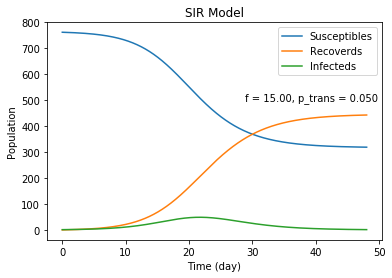

Percent of the population never infected =  41.8543651157884


Here is 50 interactions per day. The result is less than 1% who were never infected. So 99% get the infection. But it lasts only 14 days. The peak is about 363 infected.


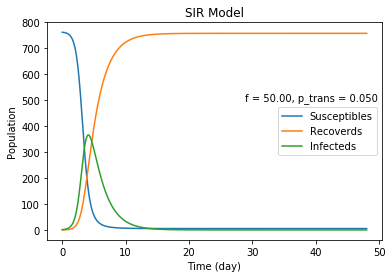

Percent of the population never infected =  0.6840750776887548

Decreasing the frequency of daily interactions flattens the curve, which decreases the peak but extends it in time. With very low frequency of daily interactions, a significant number of susceptibles never become infected. But for a high frequency, more than 99% become infected.


In [6]:
### BEGIN SOLUTION
print("The variable corresponding to social distancing is the frequency of daily interactions, f.")

def runTransModel(f,p_trans):
    t = 0
    dt = 0.01 #unit is day
    t_total = 48 #number of days to run the model

    N = 763 #total population
    S = N - 1
    I = 1
    R = 0

#    f = 33.3 #interactions of an infected person per day with the total population
#    p_trans = 0.05 #fraction of interactions with a susceptible that result in transmission

    r_SI = f*p_trans/N #transmission coefficient
    r_RI = 0.5

    tdata = []
    Sdata = []
    Idata = []
    Rdata = []

    while t < t_total:

        Sdot = -r_SI*S*I
        Rdot = r_RI*I
        Idot = -Sdot + -Rdot

        S = S + Sdot*dt
        R = R + Rdot*dt
        I = I + Idot*dt

        t = t + dt

        tdata.append(t)
        Sdata.append(S)
        Rdata.append(R)
        Idata.append(I)

    fig = plt.figure()
    plt.title("SIR Model")
    plt.xlabel("Time (day)")
    plt.ylabel("Population")
    plt.plot(tdata, Sdata, label='Susceptibles')
    plt.plot(tdata, Rdata, label='Recoverds')
    plt.plot(tdata, Idata, label='Infecteds')
    plt.text(0.6*t_total,500,'f = {:.2f}, p_trans = {:.3f}'.format(f,p_trans))
    plt.legend()
    plt.show()
    #plt.savefig('SIR-high-trans.png')
    
    percent_not_infected = S/(N-1)*100
    print("Percent of the population never infected = ", percent_not_infected)
    return(percent_not_infected)


print()

print("Here is 15 interactions per day. The result is 42% who were never infected but infecteds last about 45 days. The peak is about 22 infected.")

percent_not_infected = runTransModel(15,0.05)


print()
print()

print("Here is 50 interactions per day. The result is less than 1% who were never infected. So 99% get the infection. But it lasts only 14 days. The peak is about 363 infected.")

percent_not_infected = runTransModel(50,0.05)

print()

print("Decreasing the frequency of daily interactions flattens the curve, which decreases the peak but extends it in time. With very low frequency of daily interactions, a significant number of susceptibles never become infected. But for a high frequency, more than 99% become infected.")

### END SOLUTION

## Exercise 4 - Good Hygiene

If an infected person or a susceptible practices *improved hygiene* by regularly washing hands, wearing a mask, coughing into one's elbow, not touching one's face, regularly cleaning hard surfaces with a disinfectant, etc., what variable does this affect and will this variable increase or decrease as infecteds and susceptible improve their hygiene?

Run your model with better hygiene and worse hygiene. Comment on how good hygiene affects the total number of infecteds and the peak number of infecteds.


Here is a probability of 0.1 of tranmission during contact. The result is 100% being infected but infection lasts about 14 days. The peak is about 410 infected.


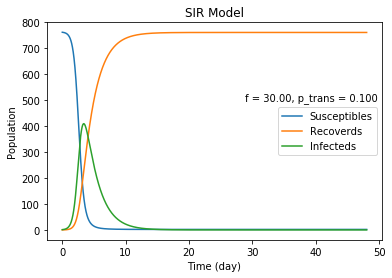

Percent of the population never infected =  0.2439982305857299

Here is a probability of 0.025 interactions per day. The result is 58% infected. So 99% get the infection. But it lasts more than 40 days. The peak is about 43 infected.


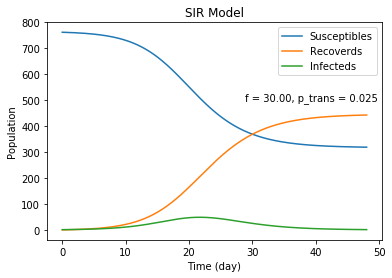

Percent of the population never infected =  41.8543651157884

Decreasing the probability of transmission during an interaction flattens the curve, which decreases the peak but extends it in time. With very low probability of transmission, a significant number of susceptibles never become infected.


In [7]:
print()

print("Here is a probability of 0.1 of tranmission during contact. The result is 100% being infected but infection lasts about 14 days. The peak is about 410 infected.")

percent_not_infected = runTransModel(30,0.1)


print()

print("Here is a probability of 0.025 interactions per day. The result is 58% infected. So 99% get the infection. But it lasts more than 40 days. The peak is about 43 infected.")

percent_not_infected = runTransModel(30,0.025)

print()

print("Decreasing the probability of transmission during an interaction flattens the curve, which decreases the peak but extends it in time. With very low probability of transmission, a significant number of susceptibles never become infected.")

### END SOLUTION